In [154]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

feature_labels = np.arange(280)
row_labels = np.arange(452)

# Import PatientData.csv with Pandas and show the data
data = pd.read_csv('PatientData.csv', names=feature_labels, index_col=False)

print(data)
print(data.index)

     0    1    2    3    4    5    6    7    8    9    ...  270   271   272  \
0     75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0  -0.9   
1     56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5   0.0   
2     54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5  -2.4   
3     55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2  -2.2   
4     75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1  -3.6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0   4.3  -5.0   
448   37    0  190   85  100  137  361  201   73   86  ...  0.0  15.6  -1.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  0.0  16.3 -28.6   
450   32    1  155   55   93  106  386  218   63   54  ... -0.4  12.0  -0.7   
451   78    1  160   70   79  127  364  138   78   28  ...  0.0  10.4  -1.8   

     273  274  275  276   277   278  279  
0    0.0

(a) There are 452 patients and 279 features. 

46.4712389380531

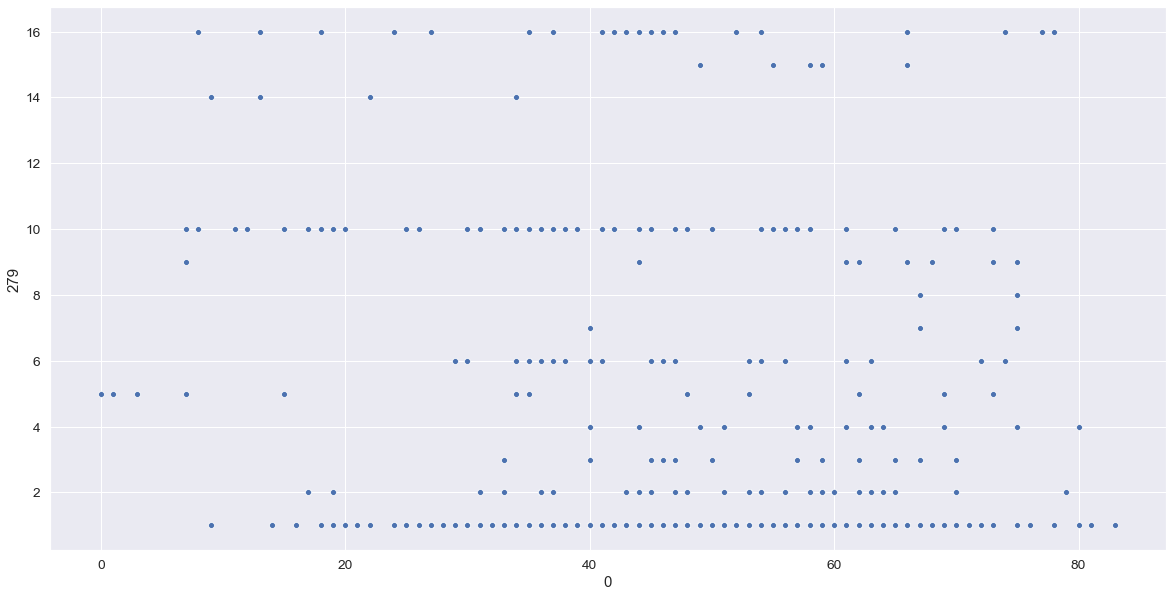

In [155]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data[0], data[279])
np.mean(data[0])

This is the first feature of the dataframe. Here we can see that this feature has a mean of 46.4. This seems to resemble the average age of patients that are admitted into a health facility and sampled. Also we can see that different conditions have different age distributions, which may be a result of dissimilar diseases/conditions.

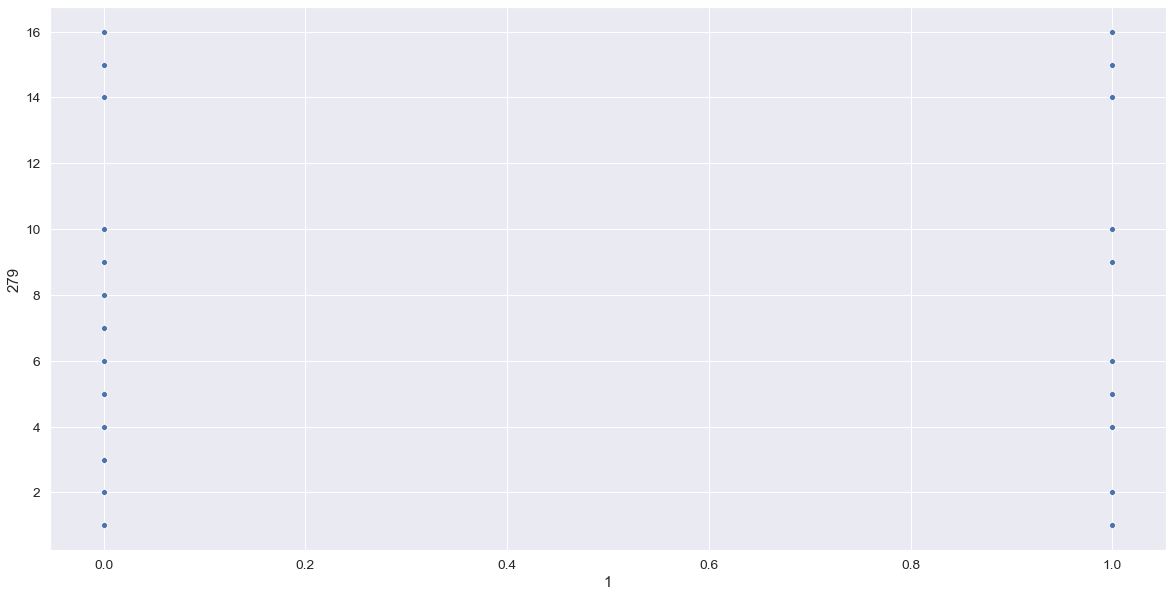

In [156]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data[1], data[279])

For this feature, we see that it is binary. Since this is patient data, it is most likely representative of the patient's sex (probably only binary feature).

163.84222222222223

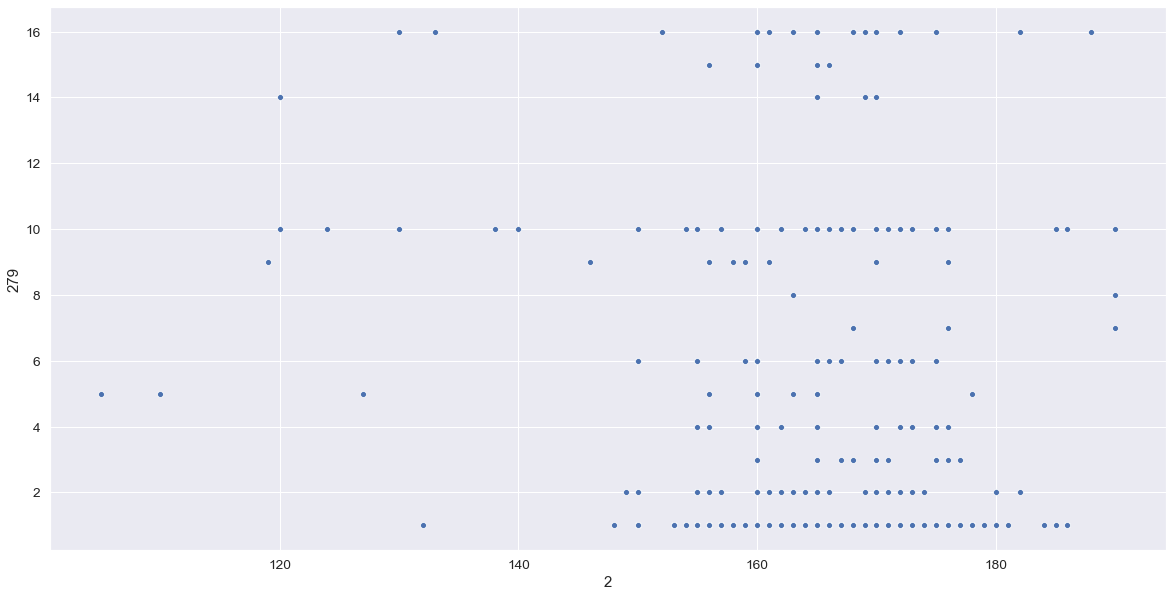

In [157]:
fig, ax = plt.subplots(figsize=(20,10))
data = data[data[2] < 200]
sns.scatterplot(data[2], data[279])
np.mean(data[2])

With the third feature, we have come across a mean of 163.7. We believe this is representative of the patient's weight.

68.43777777777778

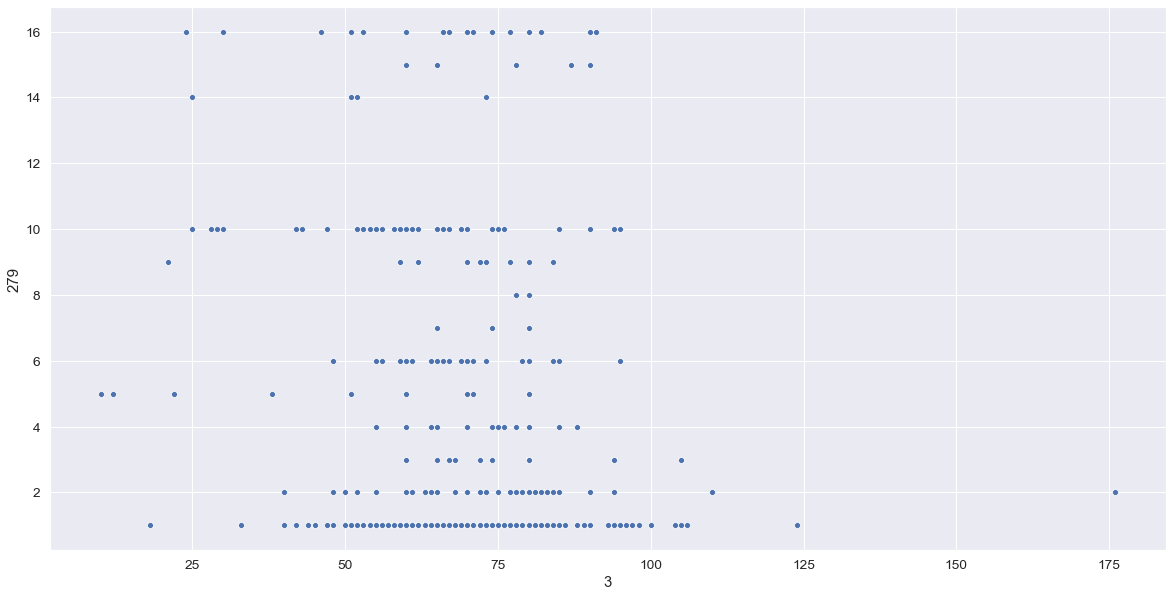

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data[3], data[279])
np.mean(data[3])

In our last feature, we get a mean of 68. This is very similar to the average resting BPM of a human. Therefore, we have reason to believe this represents the resting BPM of the patient.

In [159]:
# data.replace('?', np.nan, inplace=True)

for column in data.columns:
    
    sum1, count = 0.0, 0
    for row in data.index:
        
        if (data.loc[row,column] != '?'):
            sum1 += float(data.loc[row,column])
            count += 1
     
    if (count > 0):
        column_mean = sum1/count
    else:
        column_mean = 0
        
    print(column_mean)
    
    for row in data.index:
        if ((data.loc[row,column]) == '?'):
            data.loc[row,column] = column_mean

46.675555555555555
0.5511111111111111
163.84222222222223
68.43777777777778
88.94222222222223
155.19555555555556
367.79777777777775
170.08666666666667
90.03555555555556
33.35333333333333
36.199095022624434
49.1892523364486
36.53674832962138
-13.592105263157896
74.12472160356347
5.653333333333333
51.75111111111111
20.844444444444445
0.14222222222222222
0.0
30.106666666666666
0.0022222222222222222
0.011111111111111112
0.011111111111111112
0.0044444444444444444
0.0044444444444444444
0.008888888888888889
5.644444444444445
54.41777777777778
20.595555555555556
0.39111111111111113
0.12444444444444444
31.68888888888889
0.017777777777777778
0.028888888888888888
0.0022222222222222222
0.0044444444444444444
0.0044444444444444444
0.015555555555555555
16.09777777777778
41.973333333333336
20.373333333333335
2.2577777777777777
0.32
30.48
0.0022222222222222222
0.035555555555555556
0.0022222222222222222
0.017777777777777778
0.011111111111111112
0.0022222222222222222
45.404444444444444
19.253333333333334


Here we have replaced all of the missing values with their correspsonding column mean.

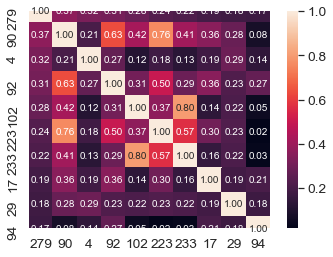

In [162]:
corr_matrix = data.corr()

k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k,279)[279].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

By creating a correlation matrix, we can find the top correlated features with our predicted label. Therefore, according to the matrix our top 3 features are columns 90, 4, and 92.